# The Disparity in The Mean Working Hours per Week for Individuals from Economically Developed Countries (EDC) Versus Less Economic Developed Countries (LEDC)

### Authors: Michelle Nguyen, Shubhang Mittal, Peter Lee, Dylan Ho

## Introduction

Countries are often categorized as More Economically Developed Countries or Economically Developed Countries (EDC) or Less Economically Developed Countries (LEDC) based on their factors of economic development. However, other than economic development factors, a substantial variety of differences are often observed between individuals from these two categories, work culture being one of them.(Olaniran, Bolanle A., and Mary F. Agnello) A reflection of the work culture, in this context, can be observed through the amount of time spent working per week.(Boeckmann, Irene, et al.)

The number of hours each week that an individual spends working on a commercial activity in a typical week is defined by the term hours per week. The working hours per week of an individual is amortized, or averaged over a long period, to take into account working over-time and unscheduled shifts. This project proposes to compare this attribute, and to explore this idea by estimating the mean working hours for three Economically Developed Countries (Namely: England, Canada and Germany)  and three Less Economically Developed Countries (Namely: India, Jamaica and Philippines). 

Initially we were working with one EDC and LEDC. Based on our feedback, we found it beneficial to compare various different countries categorized as EDC and LEDC. However, Our dataset is limited and has countries which have 29,190 data points (the United States) and countries with just 1 data point (Netherlands). To keep approximately equal scale between LEDC and EDCs, we picked 3 countries of each category to make representative samples of LEDC countries and EDC countries of samples 393 and 348 respectively. This leads us to our research question:

Question: What is the disparity in the mean working hours per week for individuals from Less Economically Developed Countries (Namely: India, Jamaica and Philippines), and (More) Economically Developed Countries (Namely: England, Canada and Germany).

To assess this, we will be using the “Census Income Data Set dataset” found on the UCI ML Repository. This Dataset is a mined sample from the 1994 Census database.(Kohavi, Ronny, and Barry Becker.) The Dataset presents a variety of attributes such as age, education, marital-status; moreover, it includes attributes of our interest such as native country and the hours worked per week.

## Preliminary Results

### Importing Modules

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Downloading Dataset

In [2]:
adult <- read_csv("https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv")
head(adult)


── Column specification ────────────────────────────────────────────────────────
cols(
  Age = col_double(),
  workclass = col_character(),
  fnlwgt = col_double(),
  education = col_character(),
  `education-num` = col_double(),
  `marital-status` = col_character(),
  occupation = col_character(),
  relationship = col_character(),
  race = col_character(),
  sex = col_character(),
  `capital-gain` = col_double(),
  `capital-loss` = col_double(),
  `hours-per-week` = col_double(),
  `native-country` = col_character()
)


Warning message:
“32561 parsing failures.
row col   expected     actual                                                               file
  1  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  2  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  3  -- 14 columns 15 columns 'https://raw.githubusercontent.com/mn2002/stat-201/main/adult.csv'
  4  -- 14 columns 15 columns 'https://raw

Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


*Figure 1.1: Original Adult Dataset. The datset uses dash-case or hypen-case in its column names and data values. Dash-case column names cannot be accessible by R as it is an invalid character in the language.*

### Wrangling and Tidying the Dataset

In [3]:
#Creating R accessible column names for the dataset
colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 'education_num',
                     'maritial_status', 'occupation', 'relationship', 'race', 'sex',
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country')

#Count of observations for each native country in the dataset
native_country_count <- adult %>%
    select(native_country) %>%
    group_by(native_country) %>%
    tally()
native_country_count

,native_country,n
,<chr>,<int>
1,?,583
2,Cambodia,19
3,Canada,121
4,China,75
5,Columbia,59
6,Cuba,95
7,Dominican-Republic,70
8,Ecuador,28
9,El-Salvador,106


*Figure 1.2: Tibble of number of observations in adult dataset for each native country. Displayed and used for selecting interested native countries*

In [4]:
#Defining the interested native countries
target_countries <- c("Canada", "Germany", "England", "India", "Jamaica", "Philippines")

#Selecting interested variables in the dataset
hours <- adult %>%
    select(hours_per_week, native_country) %>%
    filter(native_country %in% target_countries) %>% 
    mutate(native_country = as_factor(native_country)) %>%
    na.omit()
head(hours)

hours_per_week,native_country
<dbl>,<fct>
16,Jamaica
40,India
40,England
50,Canada
40,Germany
40,Philippines


*Figure 1.3: Hours dataset with the interested variables, Hours Worked Per Week and the Native Country with categories Canada, Germany, England, India, Jamaica, and Philippines. Ensured dataset does not contain any missing or invalid values.*

The dataset contains the following variables:
- hours_per_week: The number of hours an individual in the sample worked per week
- native_country: The individual's birth country

Our dataset contains our random variable, the hours an individual works per week, which spreads across the native country category which consists of the categories Canada, Germany, England, India, Jamaica, and Philippines. The catergories within native country were chosen to focus on the differences of our random variable with individuals from a developed and a developing country.

In [5]:
#Defining interested native countries for economically developed countries
target_edc <- c("England", "Canada", "Germany")

#Mutating or adding column to dataset to specify native country type
hours <- hours %>%
    mutate(country_type = as_factor(ifelse(native_country %in% target_edc, "EDC", "LEDC")))
head(hours)

hours_per_week,native_country,country_type
<dbl>,<fct>,<fct>
16,Jamaica,LEDC
40,India,LEDC
40,England,EDC
50,Canada,EDC
40,Germany,EDC
40,Philippines,LEDC


*Figure 1.4: Hours dataset with added Country Type attribute to specify if the native country of the observation is classified as Economically Developed Country (EDC) or Less Economically Developed Country (LEDC).*

The dataset now contains the following variables:
- hours_per_week: The number of hours an individual in the sample worked per week
- native_country: The individual's birth country
- country_type: The EDC vs. LEDC classification of the native country

The modified dataset contains another column or attribute that provides information on whether an individual's native country is an Economically Developing Country (EDC) or a Less Economically Developed Country (LEDC).

In [6]:
#Printing numbers of rows related to the dataset
cat("Number of instances in the wrangled and tidied dataset: ", nrow(hours), "\n")

cat("\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from a target EDC: ",
    nrow(filter(hours, country_type == "EDC")), "\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from England: ",
    nrow(filter(hours, native_country == "England")), "\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from Canada: ",
    nrow(filter(hours, native_country == "Canada")), "\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from Germany: ",
    nrow(filter(hours, native_country == "Germany")), "\n")

cat("\n")
cat("Number of instances retaining information regarding hours worked per week for Individuals from a target LEFC: ",
    nrow(filter(hours, country_type == "LEDC")), '\n')
cat("Number of instances retaining information regarding hours worked per week for Individuals from India: ",
    nrow(filter(hours, native_country == "India")), '\n')
cat("Number of instances retaining information regarding hours worked per week for Individuals from Jamaica: ",
    nrow(filter(hours, native_country == "Jamaica")), '\n')
cat("Number of instances retaining information regarding hours worked per week for Individuals from Philippines: ",
    nrow(filter(hours, native_country == "Philippines")), '\n')

Number of instances in the wrangled and tidied dataset:  727 

Number of instances retaining information regarding hours worked per week for Individuals from a target EDC:  348 
Number of instances retaining information regarding hours worked per week for Individuals from England:  90 
Number of instances retaining information regarding hours worked per week for Individuals from Canada:  121 
Number of instances retaining information regarding hours worked per week for Individuals from Germany:  137 

Number of instances retaining information regarding hours worked per week for Individuals from a target LEFC:  379 
Number of instances retaining information regarding hours worked per week for Individuals from India:  100 
Number of instances retaining information regarding hours worked per week for Individuals from Jamaica:  81 
Number of instances retaining information regarding hours worked per week for Individuals from Philippines:  198 


### Random Variable Distribution

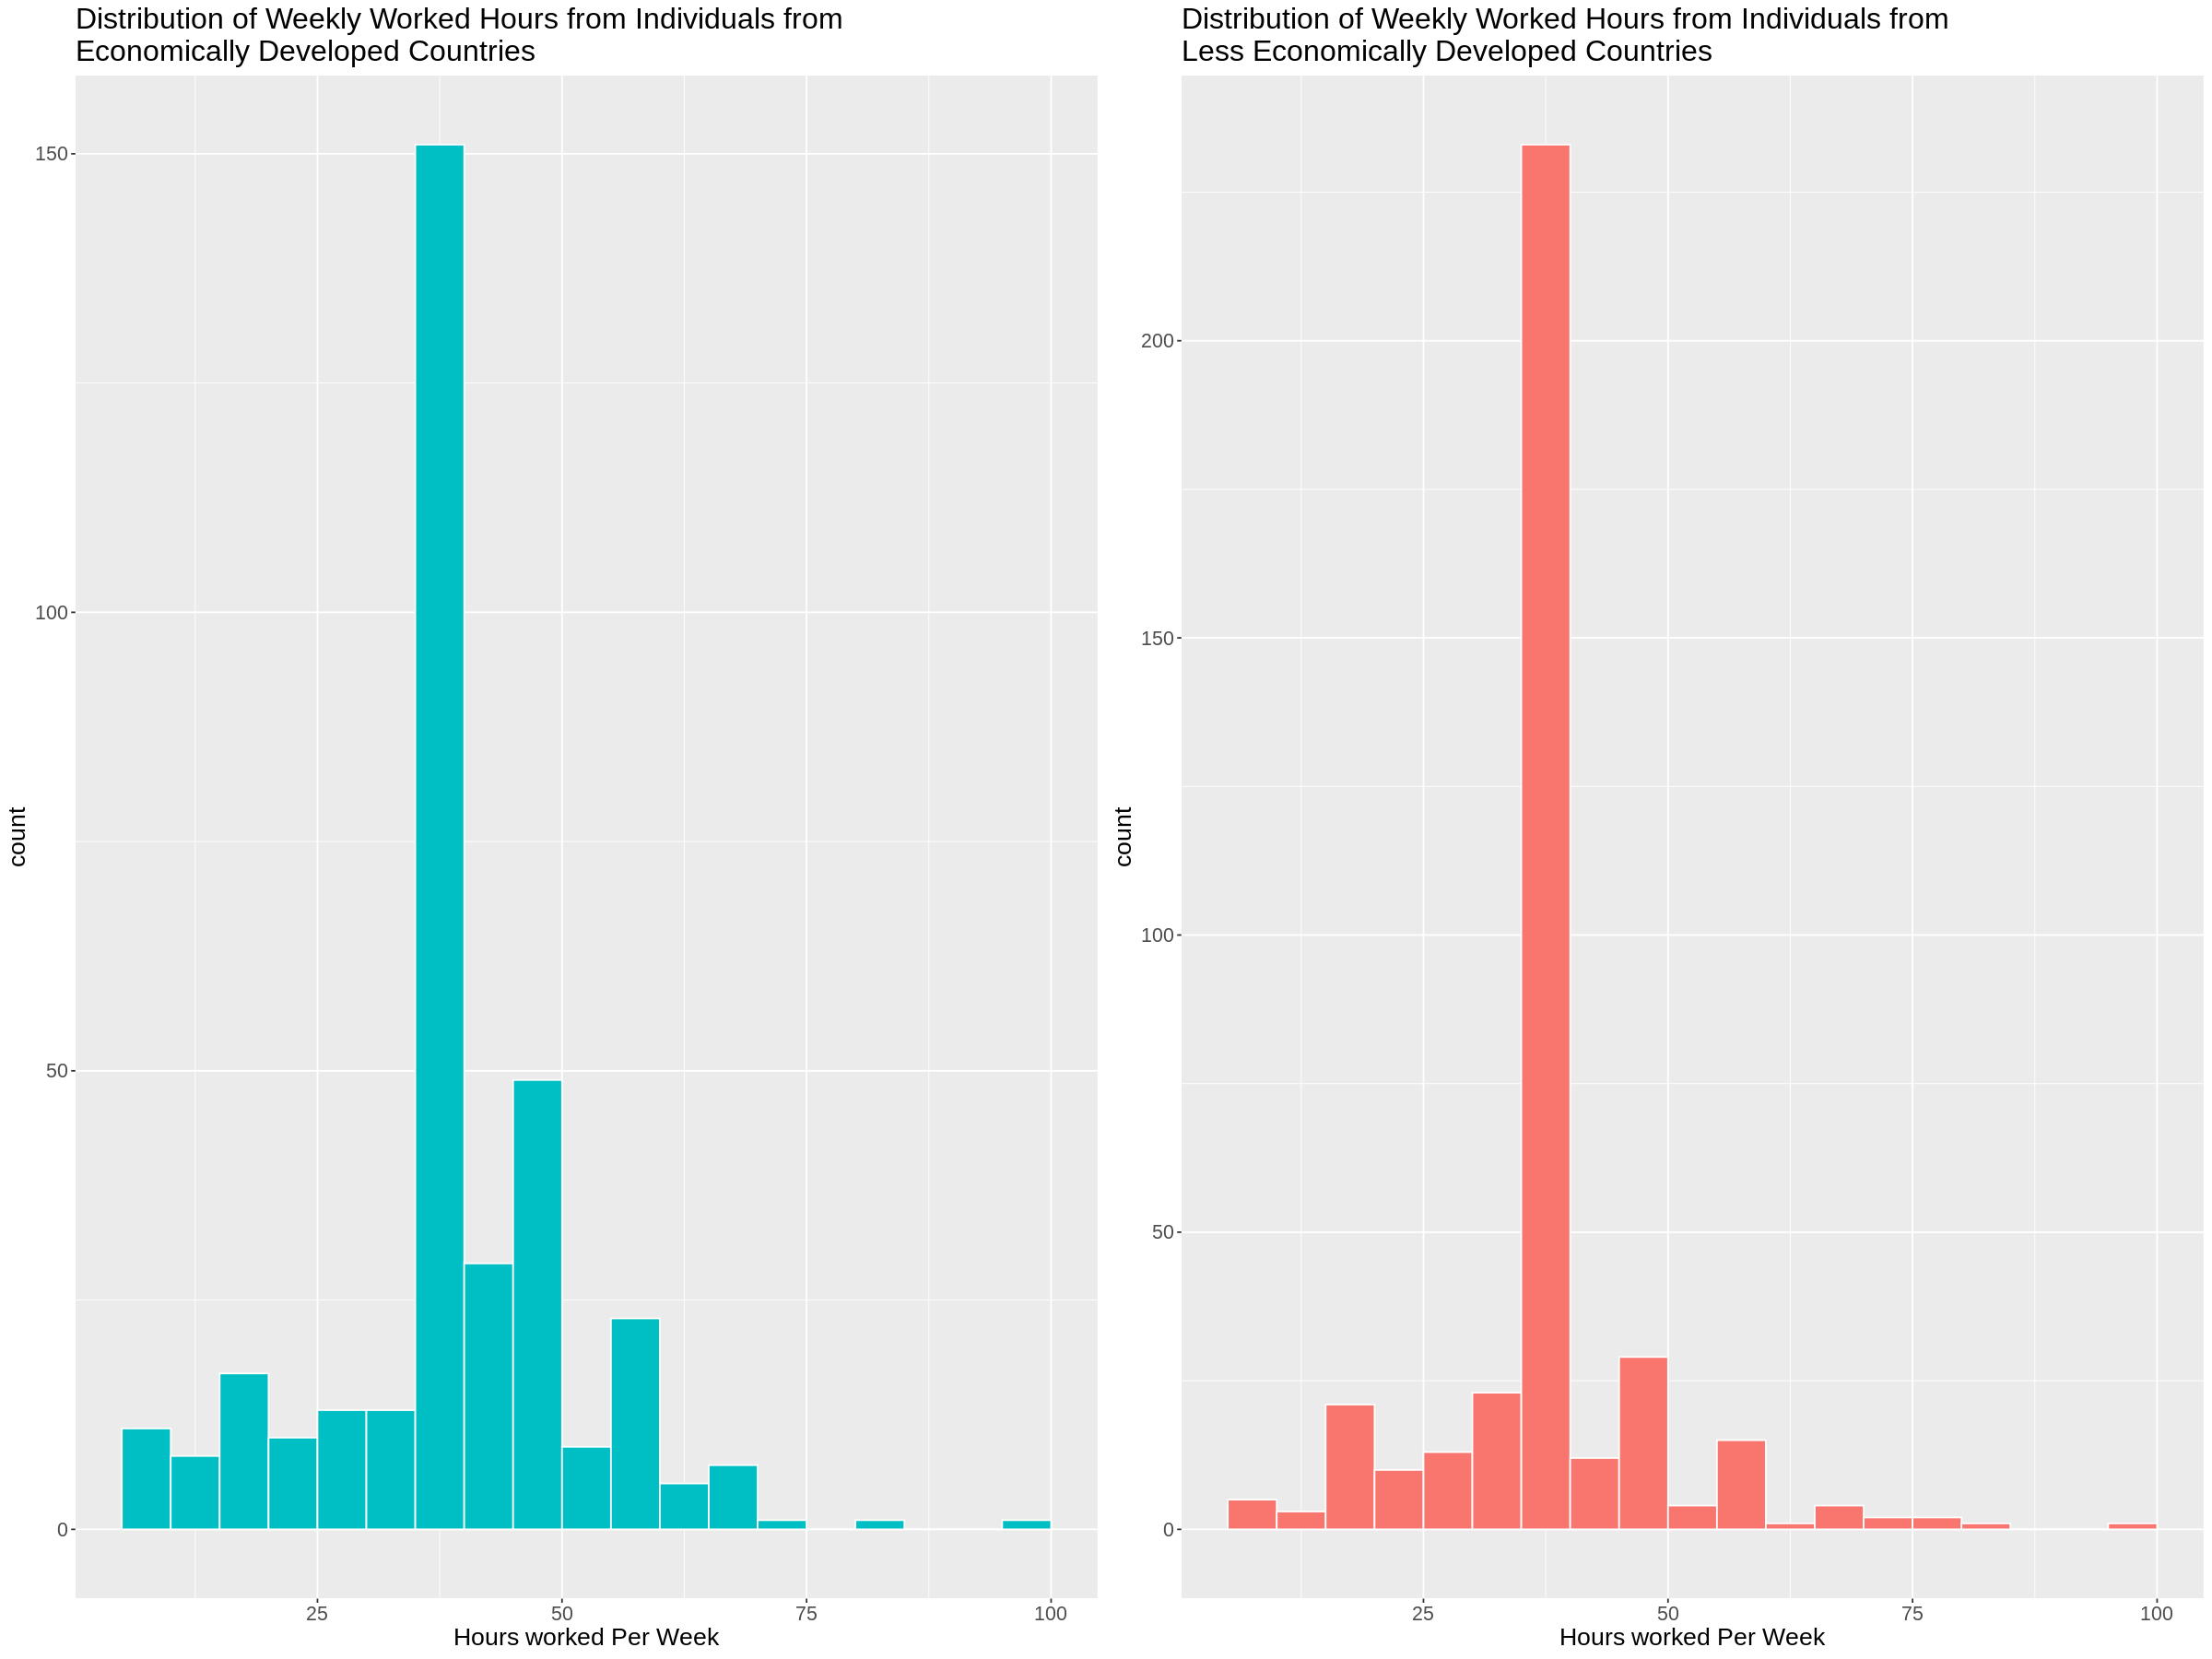

In [7]:
options(repr.plot.width = 20, repr.plot.height = 15)
#Histogram to Visualize Random Variable's Distribution Specific to EDC Category
hours_edc_plot <- hours %>% 
    filter(country_type == "EDC") %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5, boundary = 0, colour = 'white', fill = "#00BFC4") +
    labs(title = "Distribution of Weekly Worked Hours from Individuals from \nEconomically Developed Countries",
        x = "Hours worked Per Week") +
    theme(text = element_text(size = 16))

#Histogram to Visualize Random Variable's Distribution Specific to LEDC Category
hours_ledc_plot <- hours %>% 
    filter(country_type == "LEDC") %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5, boundary = 0, colour = 'white', fill = "#F8766D") +
    labs(title = "Distribution of Weekly Worked Hours from Individuals from \nLess Economically Developed Countries",
        x = "Hours worked Per Week") +
    theme(text = element_text(size = 16))

plot_grid(hours_edc_plot, hours_ledc_plot)

*Figure 1.5: Side by Side Histograms Comparison of the Distribution of Hours Worked Per Week for Individuals from EDC and LEDC*

### Categorical Comparison 

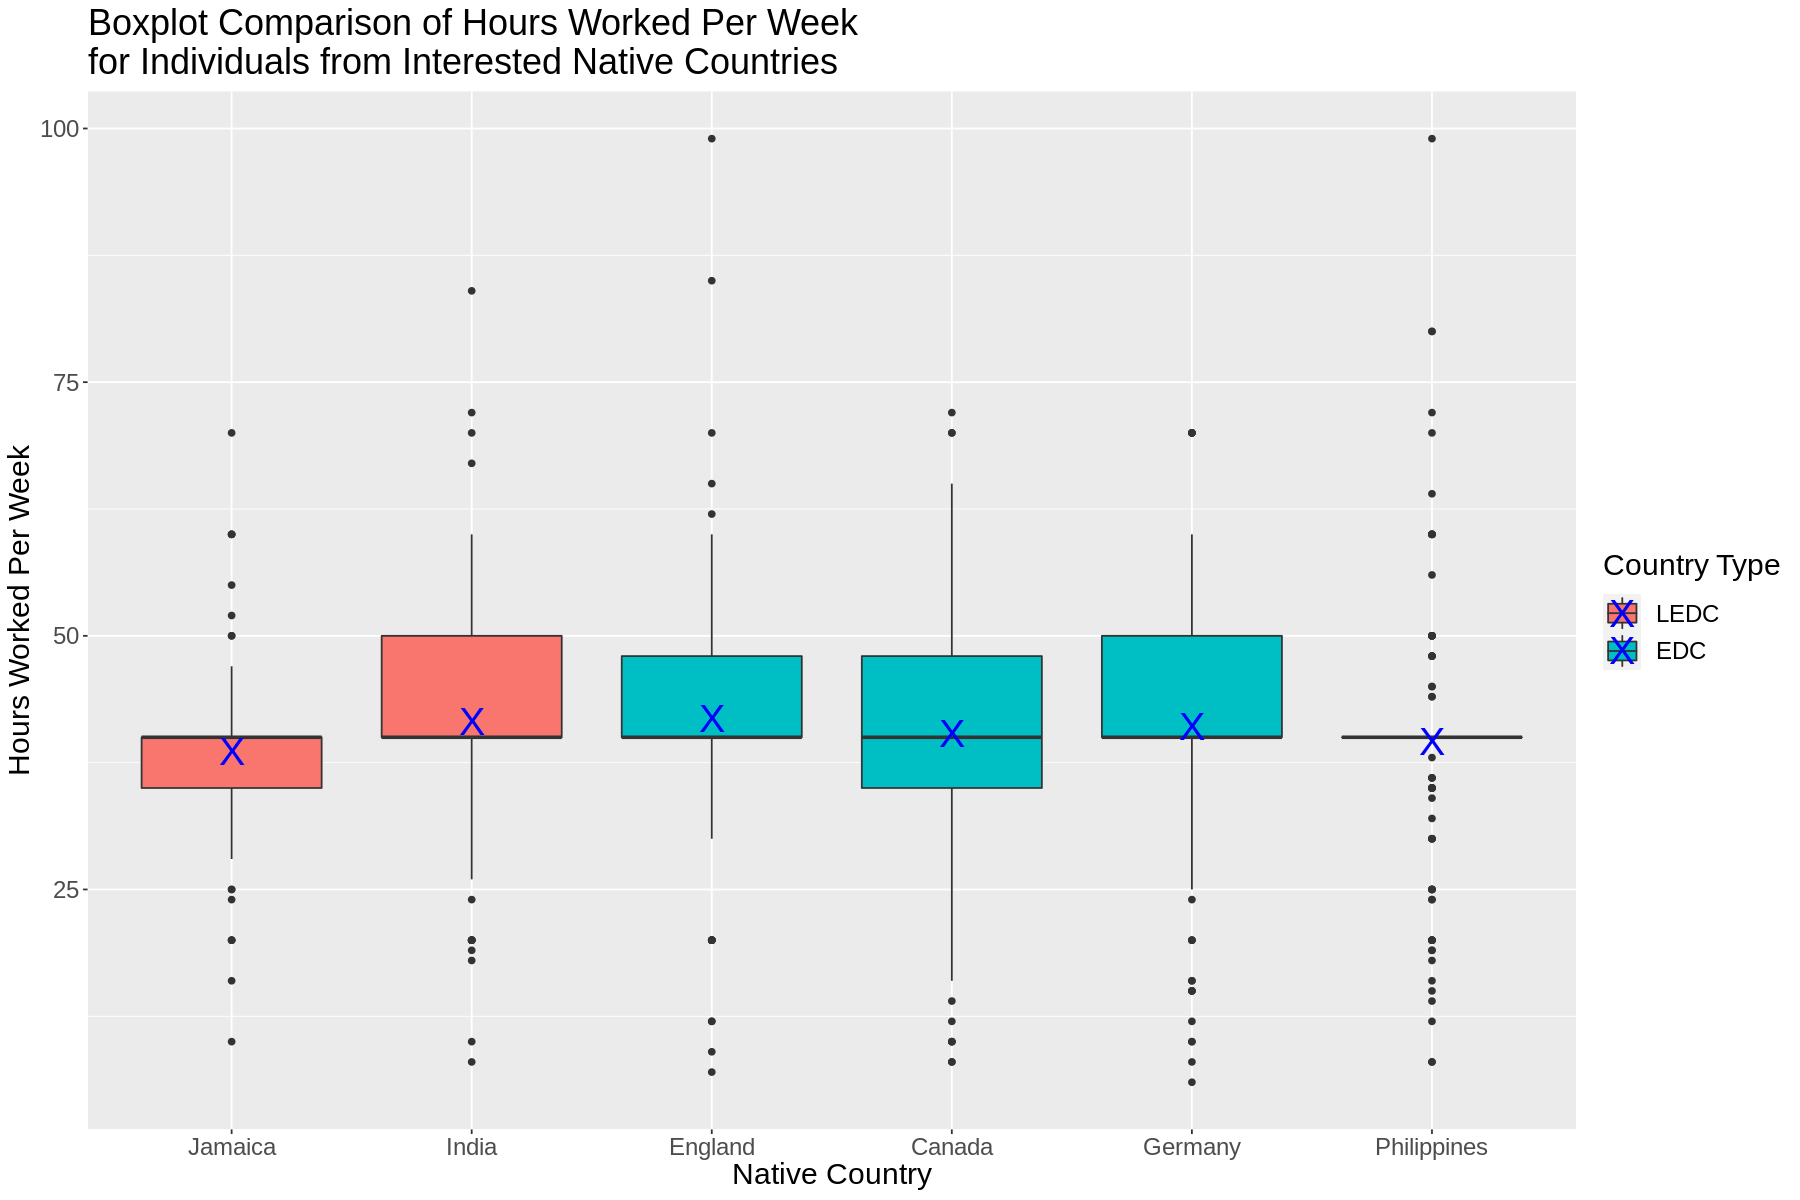

In [8]:
#Boxplot to Visualize Disparities Between Native Countries
options(repr.plot.width = 15, repr.plot.height = 10)
boxplot <- hours %>%
    ggplot(aes(x = native_country, y = hours_per_week, fill = country_type)) + 
    geom_boxplot() +
    labs(title = "Boxplot Comparison of Hours Worked Per Week \nfor Individuals from Interested Native Countries",
        x = "Native Country",
        y = "Hours Worked Per Week",
        fill = "Country Type") +
    theme(text = element_text(size = 18))
boxplot + stat_summary(fun=mean, geom="point", shape = "X", size=8, colour = "blue")

*Figure 1.6: Boxplot displaying spread of Hours Worked Per Week for Individuals from Jamaica, India, England, Cnaada, Germany, and Philippines. The coloured boxplot identifies whether the native country is an EDC or an LEDC. The Blue X Marks the Mean Hours Per Week For Each Native Country.*

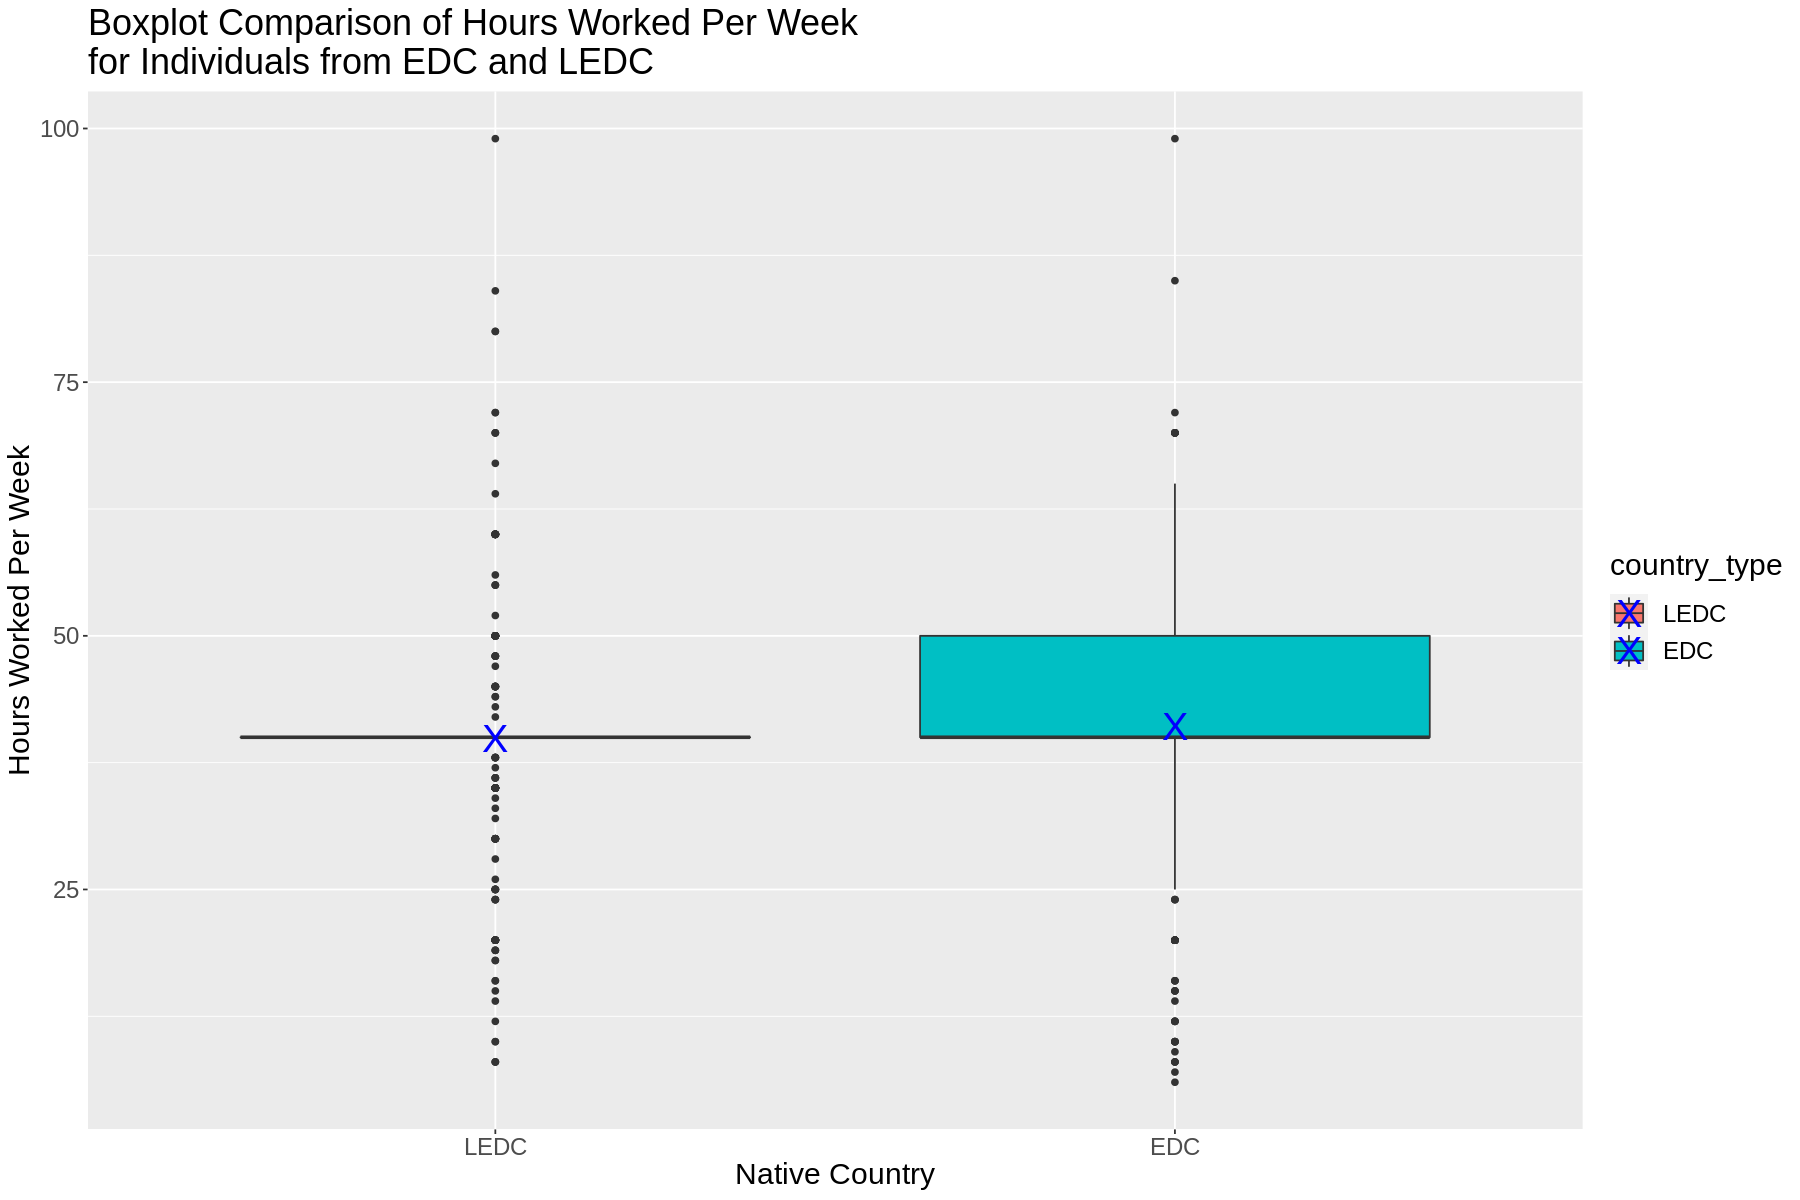

In [9]:
#Boxplot to Visualize Disparities Between Country Types
options(repr.plot.width = 15, repr.plot.height = 10)
boxplot <- hours %>%
    ggplot(aes(x = country_type, y = hours_per_week, fill = country_type)) + 
    geom_boxplot() +
    labs(title = "Boxplot Comparison of Hours Worked Per Week \nfor Individuals from EDC and LEDC",
        x = "Native Country",
        y = "Hours Worked Per Week") +
    theme(text = element_text(size = 18))
boxplot + stat_summary(fun=mean, geom="point", shape = "X", size=8, colour = "blue")

*Figure 1.7: Boxplot displaying spread of Hours Worked Per Week for individuals from an EDC or an LEDC. The blue X marks the mean hours per week for each country type.*

### Preliminary Estimates

In [10]:
#Computing Parameter Estimates and Displaying Within Tibble
estimates <- hours %>%
    group_by(country_type) %>%
    summarize(mean = mean(hours_per_week), 
             standard_deviation = sd(hours_per_week))
estimates

,country_type,mean,standard_deviation
,<fct>,<dbl>,<dbl>
1,LEDC,39.89182,10.88839
2,EDC,41.01437,13.04779


*Figure 1.8: Tibble with estimates of mean and standard deviation of the Hours Worked Per Week for individuals from the country types EDC and LEDC consisting of the selected native countries*

## Methods: Plan

We first acknowledge that our dataset “Adult.csv” is a smaller sample of the census taken in 1994. The dataset has been cited by various peer-reviewed academic journals, making it prime for statistical exploration and reliable. 

From the side-by-side histogram (Figure 1.5), we notice that both the histograms do not have a normal distribution. As our dataset is a sample of a whole population, we do not have access to a sampling distribution; therefore, it would be beneficial to take a bootstrap sample for further analysis such as estimating the mean parameters, computing a confidence interval, and carrying out hypothesis testing. Further, it might be helpful to compare this with the asymptotic methods.

From the side-by-side box plots (Figure 1.7), we see that there are more outliers for the number of hours worked per week by individuals from a less economically developed country compared to their economically developed country counterpart, which has more observations closer to its median. This indicates that the standard deviation of the hours_per_week for individuals from an EDC will be greater than the hours_per_week for individuals from an LEDC. Both the boxplots appear to have roughly the same median, which is closely alligned to Q1, the 25th percentile. Again, hinting that our means (a measure of the center) will be significantly close but not necessarily equal.

The initial inferences made by the box plot are confirmed by the point estimates of the mean and standard deviation (Figure 1.8). Our means are close but not equal, and the standard deviation for individuals from the an EDC is greater, as predicted. Additionally, the point estimate for the mean working hours per week for individuals natively from an EDC is greater than the point estimate for an LEDC, which contradict with the findings of Azhar, et al, suggesting longer working hours are often observed in India, classified as an LEDC, due to its overworking culture. (Azhar, Gulrez S et al) But are these results conclusive enough to prove that individuals natively from an LEDC on an average work longer hours than their EDC counterparts, or vice versa? To explore this we will further analyze our data through different methods and perform hypothesis testing.

Our plans to discover if there is a disparity in the mean working hours per week for individuals from Less Economically Developed Countries (Namely: India, Jamaica and Philippines), and (More) Economically Developed Countries (Namely: England, Canada and Germany) are to first compute the average hours worked across the entire wrangled dataset through bootstrapping. With a two population difference in means hypothesis test we set our null hypotheis (H subscript 0, H0) to be that there is no difference between the mean hours worked per week of individuals in economically developed countries and the mean hours worked per week of individuals in less economically developed countries. Therefore, or alterative hypothesis (H subscript A, HA) is that there is a difference between our the means of our interested populations. If there is do no reject the null hypothesis, we expect that individuals from both EDC and LEDC the average hours worked, through the prior bootstrapping step. Afterwards, we plans to use bootstrapping to compute the 95% confidence interval of the average hours worked per week. 

**What do we expect to find?**

We expect to find: whether there is any significant difference in the average working hours per week for individuals from the EDC vs LEDC.

**What impact could such findings have?**

Our findings could help initiate further research in work-culture differences between LEDCs and EDCs and contributing factors that lead to it.

**What future questions could this lead to?**
-         What is the disparity in the average working hours per week in all EDCs and LEDCs?
-         What are the factors that contribute to the difference/similarity in the average working hours per week in the EDC and LEDC? Are these differences comparable to the pre-globalization period?
-         What other factors contribute to making a work culture observed in economically developed countries? Will implementing a similar work culture elsewhere change its productivity level?


## Results

### Computing Average Hours Worked with Bootstrapping

In [11]:
#Computer Number of Observations or Size of Hours Dataset Sample
hours_size <- nrow(hours)

#Resampling Hours Dataset with Replacement (Bootstrapping)
set.seed(727000)
hours_resample <- hours %>%
    rep_sample_n(size = hours_size, reps = 1000, replace = TRUE)
head(hours_resample)

replicate,hours_per_week,native_country,country_type
<int>,<dbl>,<fct>,<fct>
1,40,Philippines,LEDC
1,60,England,EDC
1,38,Germany,EDC
1,30,Germany,EDC
1,30,Canada,EDC
1,40,Philippines,LEDC


*Figure 2.1: Resampled hours dataset computed with replacement with 1000 replicates of size 727.*

In [12]:
#Computing Estimates of Mean Hours Worked Per Week for Each Resample
hours_resample_estimates <- hours_resample %>%
    group_by(replicate) %>%
    summarize(resample_means = mean(hours_per_week))
head(hours_resample_estimates)

replicate,resample_means
<int>,<dbl>
1,40.55846
2,39.94223
3,40.48281
4,41.29023
5,40.76754
6,40.74140


*Figure 2.2: Table with mean estimate for each bootstrap sample*

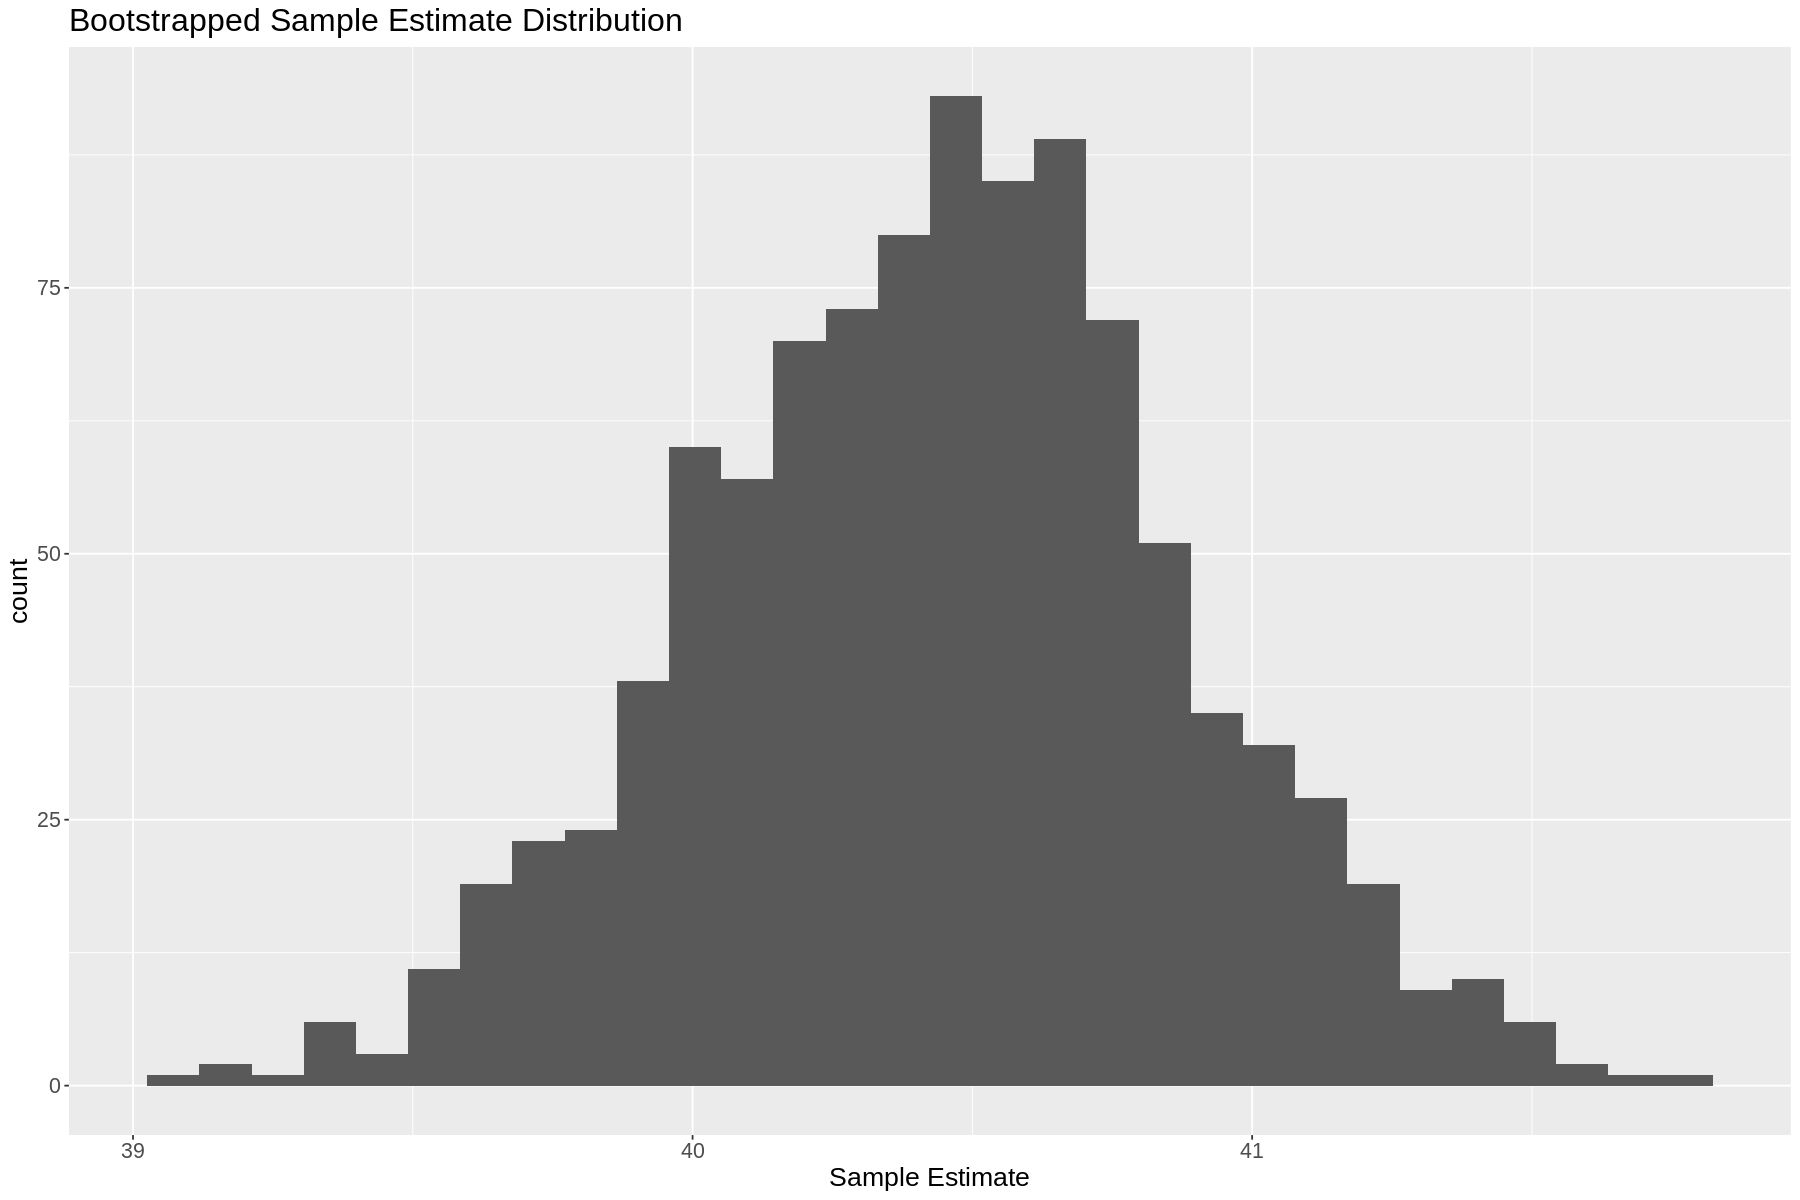

In [13]:
#Visualizing the Distribution of Bootstrap Sample Estimates
hours_resample_distribution <- hours_resample_estimates %>%
    ggplot(aes(x = resample_means)) +
        geom_histogram(bins = 30) +
        labs(title = "Bootstrapped Sample Estimate Distribution",
            x = "Sample Estimate") +
        theme(text = element_text(size = 16))
hours_resample_distribution

*Figure 2.3: Distribution of Bootstrapped Sample Estimates of 1000 replicates of size 727.*

In [14]:
#Mean and Standard Deviation of Bootstrapping 
hours_resamples_mean <- hours_resample_estimates %>%
    summarize(estimate_means = mean(resample_means),
             estimate_sd = sd(resample_means))
hours_resamples_mean

estimate_means,estimate_sd
<dbl>,<dbl>
40.44298,0.4333299


*Figure 2.4: Tibble with estimates of mean and standard deviation of hours worked per week, computed through bootstrapping.*

### Testing the Difference of Two Population Means

H0: Mean Hours Worked Per Week in EDC - Mean Hours Worked Per Week in LEDC = 0

HA: Mean Hours Worked Per Week in EDC ≠ Mean Hours Worked Per Week in LEDC = 0

In [15]:
#Count of Country Types in Dataset in Tibble Format
hours_count <- hours %>%
    count(country_type)
head(hours_count)

country_type,n
<fct>,<int>
LEDC,379
EDC,348


*Figure 2.5: Tibble with count of country types within the dataset.*

In [17]:
#Computing the Test Statistic
obs_diff_in_means <- hours %>%
    specify(formula = hours_per_week ~ country_type) %>%
    calculate(stat = "diff in means", order = c("EDC", "LEDC"))
obs_diff_in_means

stat
<dbl>
1.122547


*Figure 2.6: Observed Test Statistic.*

In [18]:
#Simulating the Null Distribution
set.seed(727000)
null_diff_in_means <- hours %>%
    specify(formula = hours_per_week ~ country_type) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("EDC", "LEDC"))
head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,-0.5806872
2,0.3288069
3,-1.4626209
4,0.3949519
5,1.3430307
6,-0.2444500


*Figure 2.7: Generating 1000 samples from the null distribtion, computer using the infer package.*

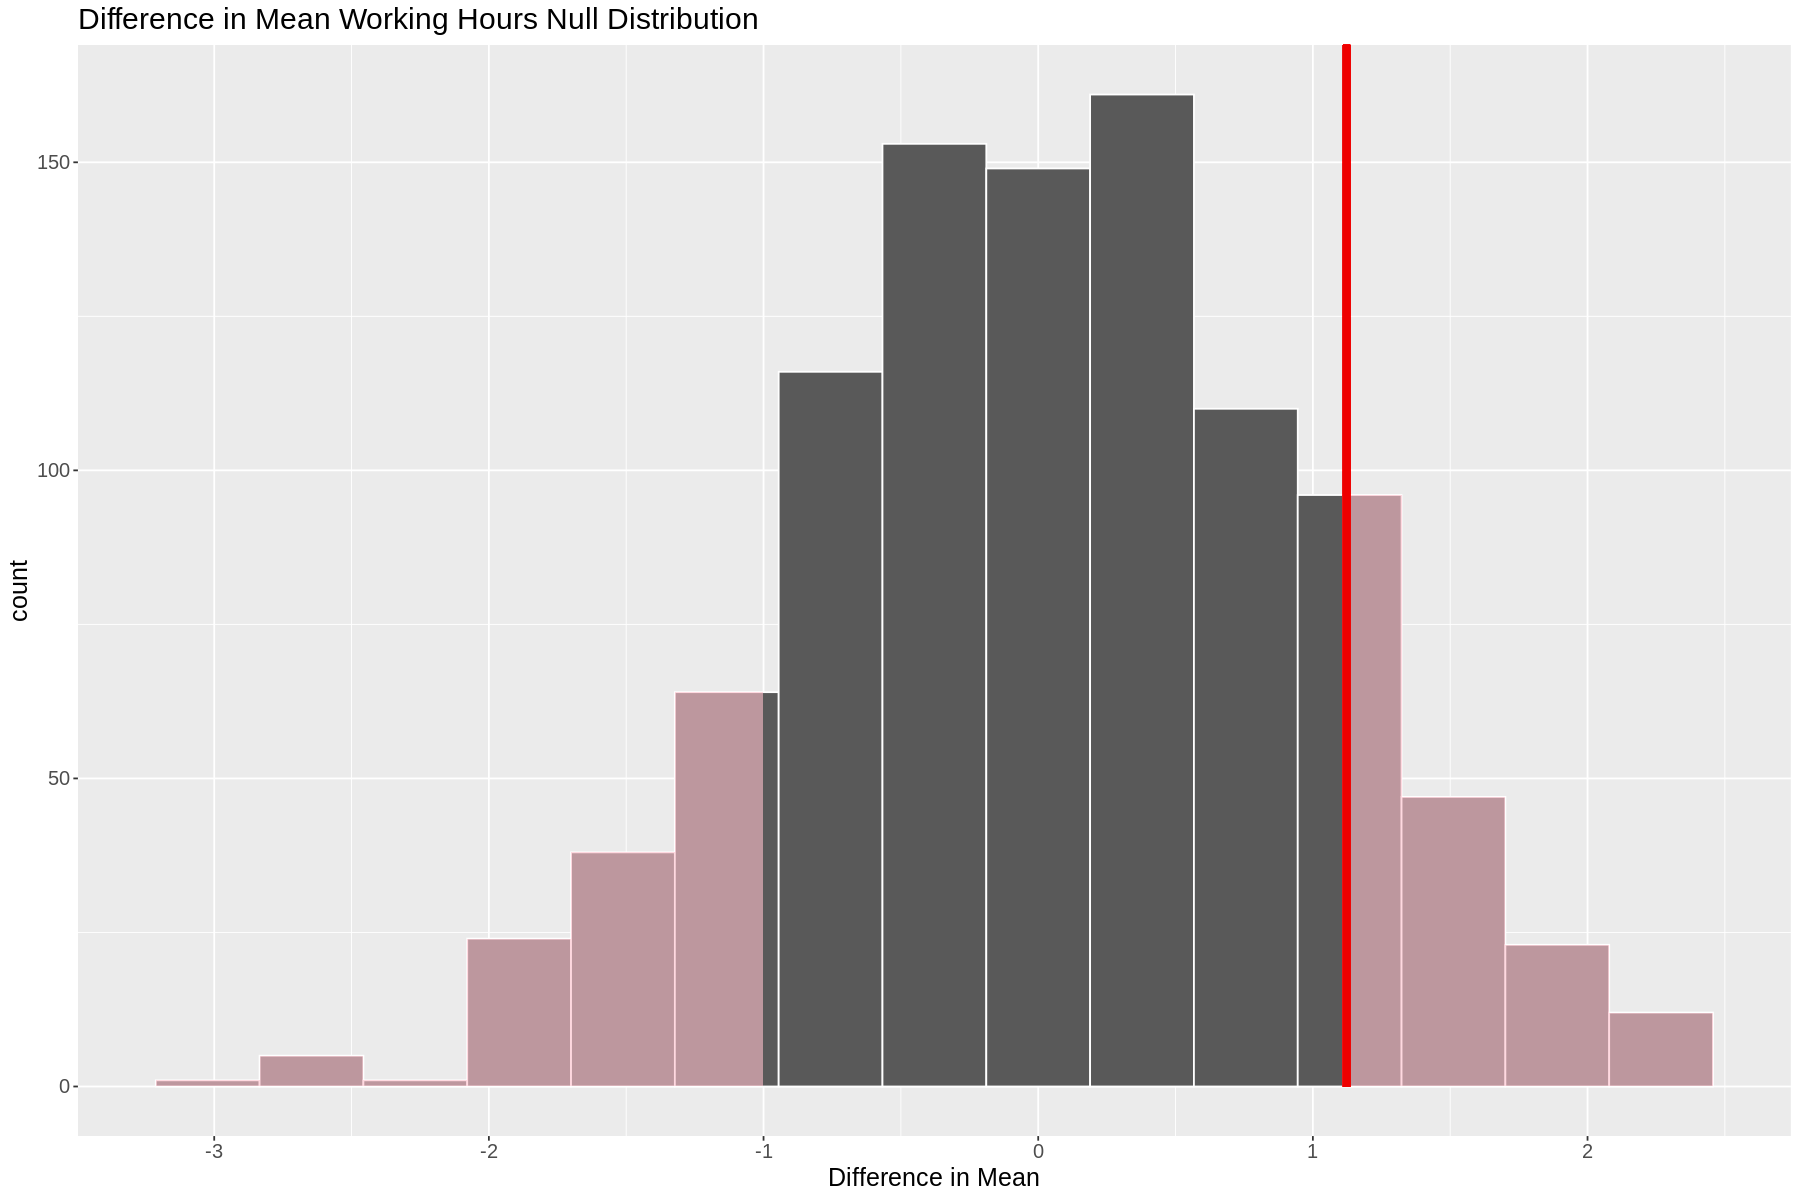

In [19]:
#Visualization of Null Distribution
diff_in_means_plot <- visualize(null_diff_in_means) +
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    labs(title = "Difference in Mean Working Hours Null Distribution",
        x = "Difference in Mean") +
    theme(text = element_text(size = 15))
diff_in_means_plot

*Figure 2.8: Results of the hypothesis test. Red vertical bar indicates the observed test statistic that was computed in Figure 2.6.*

In [20]:
#Obtaining p-value of Test Statistic from Null Distribution
p_value <- null_diff_in_means %>%
    get_p_value(obs_stat = obs_diff_in_means, direction = "both")
p_value

p_value
<dbl>
0.25


*Figure 2.9: p-value of Test Statistic being in the Null Distribution*

### Bootstrapping Confidence Interval for Difference in Means of Hours Worked Per Week in EDC and LEDC Countries

In [21]:
#Using infer Package to Find Bootstrapping Distribution for the Difference in Means
diff_in_means_bootstrap_dist <- hours %>%
    specify(formula = hours_per_week ~ country_type) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("EDC", "LEDC"))
head(diff_in_means_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,1.3007461
2,1.5681818
3,1.4523701
4,0.4423898
5,0.6550241
6,-0.7917387


*Figure 2.10: Bootstrapping distribution of 1000 samples of the difference of means using infer package.*

In [22]:
#Computing Confidence Interval
diff_in_means_ci <- diff_in_means_bootstrap_dist %>%
    get_confidence_interval(level = 0.95, type = "percentile")
diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.5052364,2.803442


*Figure 2.11: Lower and upper bounds of the 95% confidence interval*

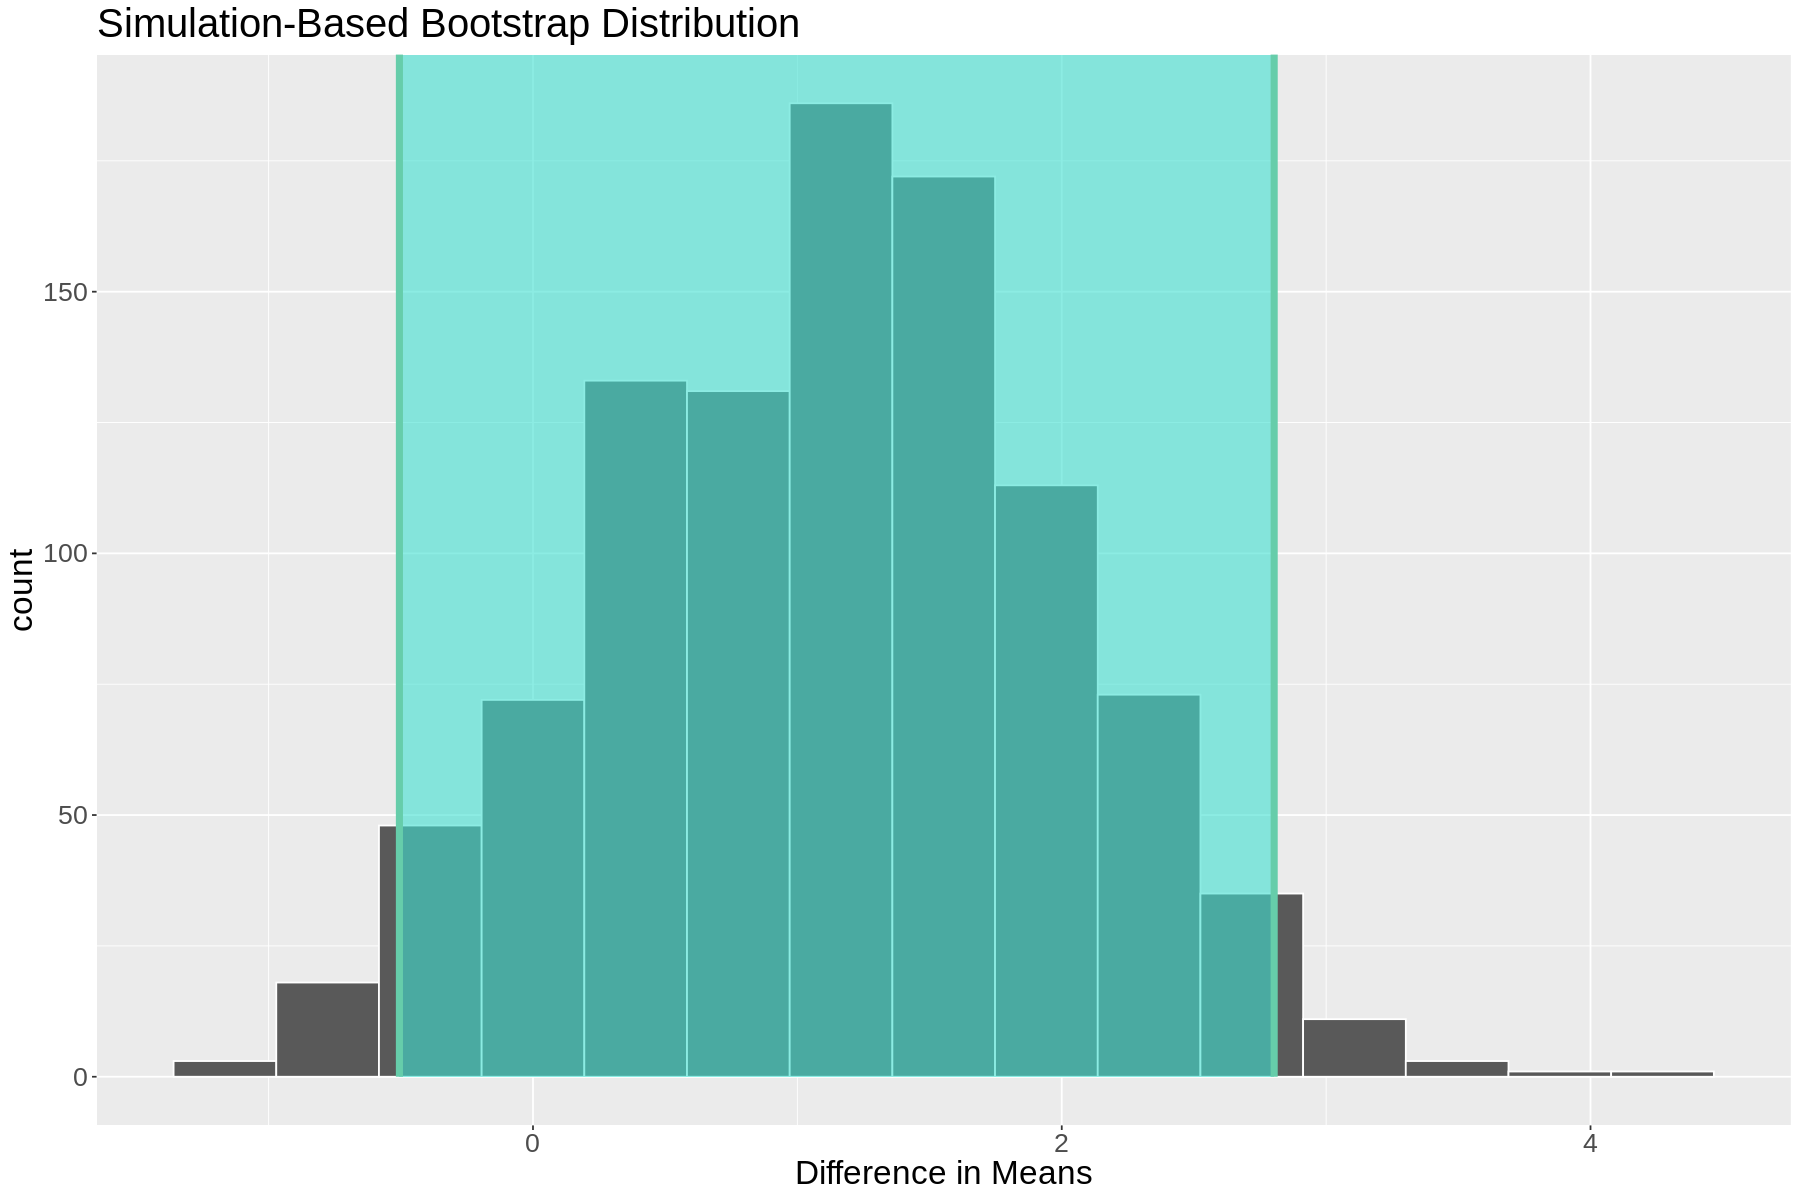

In [23]:
#Visualize Confidence Interval with Bootstrap distribution
diff_in_means_ci_plot <- visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
diff_in_means_ci_plot

*Figure 2.12: Bootstrapping distribution of differences of mean worked hours per week between econimcally developed countries and less economically developed countries. Confidence interval is displayed over top.*

## Discussion

Firstly, we set the null hypothesis(H0) to be the amount of working hours between EDC and LEDC to be equal. The alternative hypothesis is the amount of working hours for EDC is less than the working hours for LEDC. In order to obtain the test statistic, we obtain the count of country types within the dataset. Then, we use that tibble to generate our test statistic by finding out the difference in mean between the count of country types. Later on, we generate a null distribution with 1000 samples based on each countries’ working hour and their country type. We then use the generated null distribution and substituted in the test statistic to find the p-value. The p-value obtained from the distribution is 0.25. 

We have decided to use bootstrapping instead of asymptotics since we would want to compare and contrast the variability between the difference of mean working hours of EDC and LEDC. Bootstrapping will allow us to repeat the samples based on the data that we have obtained from the dataset and also it is a clear way for us to obtain our confidence interval. We use the infer package from R to bootstrap the distribution of 1000 samples of the difference of means of the working hours between LEDC and EDC. We then use the bootstrapped data to find our 95% CI. Which is (-0.5052364, 2.803442). Which means that there is a 95% chance that the difference in working hours between the 2 types of country is between -0.5 and 2.8. 

## References

- Azhar, Gulrez S et al. “Overwork Among Residents in India: A Medical Resident's Perspective.” Journal of family medicine and primary care vol. 1,2 (2012): 141-3. doi:10.4103/2249-4863.104986
- Boeckmann, Irene, et al. “Cultural and Institutional Factors Shaping Mothers' Employment and Working Hours in Postindustrial Countries.” OUP Academic, Oxford University Press, 8 Dec. 2014, https://academic.oup.com/sf/article-abstract/93/4/1301/2332153.
- Kohavi, Ronny, and Barry Becker. “Census Income Data Set.” UCI Machine Learning Repository: Census Income Data Set, https://archive.ics.uci.edu/ml/datasets/Census+Income. 
- Olaniran, Bolanle A., and Mary F. Agnello. “Globalization, Educational Hegemony, and Higher Education.” Multicultural Education & Technology Journal, Emerald Group Publishing Limited, 13 June 2008, https://www.emerald.com/insight/content/doi/10.1108/17504970810883351/full/html?casa_token=ntVIsuBDe14AAAAA%3Ac1IXCE1dZcOwsHtVagfsGRKFVb1OQjKBW23dUNOrwriVz1P3Z79x9wLX49N7a7s5J19ThZS7PkzzDQsCVdgw6A6S4MnbcWdnMilgQSxWQ2U_v3dPmWrmzg. 
